In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

%matplotlib inline

In [36]:
df = pd.read_csv("creditcard.csv")
df.shape

(284807, 31)

In [37]:
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)

In [38]:
df.describe().T

count          mean         std         min        25%        50%  \
Time    284807.0  1.453795e+01    5.847061    0.000000  10.598194  15.010833   
V1      284807.0  1.168375e-15    1.958696  -56.407510  -0.920373   0.018109   
V2      284807.0  3.416908e-16    1.651309  -72.715728  -0.598550   0.065486   
V3      284807.0 -1.379537e-15    1.516255  -48.325589  -0.890365   0.179846   
V4      284807.0  2.074095e-15    1.415869   -5.683171  -0.848640  -0.019847   
V5      284807.0  9.604066e-16    1.380247 -113.743307  -0.691597  -0.054336   
V6      284807.0  1.487313e-15    1.332271  -26.160506  -0.768296  -0.274187   
V7      284807.0 -5.556467e-16    1.237094  -43.557242  -0.554076   0.040103   
V8      284807.0  1.213481e-16    1.194353  -73.216718  -0.208630   0.022358   
V9      284807.0 -2.406331e-15    1.098632  -13.434066  -0.643098  -0.051429   
V10     284807.0  2.239053e-15    1.088850  -24.588262  -0.535426  -0.092917   
V11     284807.0  1.673327e-15    1.020713   -4.797473  -0.762494  -0.032757   
V12     284807.0 -1.247012e-15    0.999201  -18.683715  -0.405571   0.140033   
V13     284807.0  8.190001e-16    0.995274   -5.791881  -0.648539  -0.013568   
V14     284807.0  1.207294e-15    0.958596  -19.214325  -0.425574   0.050601   
V15     284807.0  4.887456e-15    0.915316   -4.498945  -0.582884   0.048072   
V16     284807.0  1.437716e-15    0.876253  -14.129855  -0.468037   0.066413   
V17     284807.0 -3.772171e-16    0.849337  -25.162799  -0.483748  -0.065676   
V18     284807.0  9.564149e-16    0.838176   -9.498746  -0.498850  -0.003636   
V19     284807.0  1.039917e-15    0.814041   -7.213527  -0.456299   0.003735   
V20     284807.0  6.406204e-16    0.770925  -54.497720  -0.211721  -0.062481   
V21     284807.0  1.654067e-16    0.734524  -34.830382  -0.228395  -0.029450   
V22     284807.0 -3.568593e-16    0.725702  -10.933144  -0.542350   0.006782   
V23     284807.0  2.578648e-16    0.624460  -44.807735  -0.161846  -0.011193   
V24     284807.0  4.473266e-15    0.605647   -2.836627  -0.354586   0.040976   
V25     284807.0  5.340915e-16    0.521278  -10.295397  -0.317145   0.016594   
V26     284807.0  1.683437e-15    0.482227   -2.604551  -0.326984  -0.052139   
V27     284807.0 -3.660091e-16    0.403632  -22.565679  -0.070840   0.001342   
V28     284807.0 -1.227390e-16    0.330083  -15.430084  -0.052960   0.011244   
Amount  284807.0  8.834962e+01  250.120109    0.000000   5.600000  22.000000   
Class   284807.0  1.727486e-03    0.041527    0.000000   0.000000   0.000000   

              75%           max  
Time    19.329722     23.999444  
V1       1.315642      2.454930  
V2       0.803724     22.057729  
V3       1.027196      9.382558  
V4       0.743341     16.875344  
V5       0.611926     34.801666  
V6       0.398565     73.301626  
V7       0.570436    120.589494  
V8       0.327346     20.007208  
V9       0.597139     15.594995  
V10      0.453923     23.745136  
V11      0.739593     12.018913  
V12      0.618238      7.848392  
V13      0.662505      7.126883  
V14      0.493150     10.526766  
V15      0.648821      8.877742  
V16      0.523296     17.315112  
V17      0.399675      9.253526  
V18      0.500807      5.041069  
V19      0.458949      5.591971  
V20      0.133041     39.420904  
V21      0.186377     27.202839  
V22      0.528554     10.503090  
V23      0.147642     22.528412  
V24      0.439527      4.584549  
V25      0.350716      7.519589  
V26      0.240952      3.517346  
V27      0.091045     31.612198  
V28      0.078280     33.847808  
Amount  77.165000  25691.160000  
Class    0.000000      1.000000

In [39]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [40]:
nan_mean = df.isna().mean()
nan_mean = nan_mean[nan_mean != 0].sort_values()
nan_mean

Series([], dtype: float64)

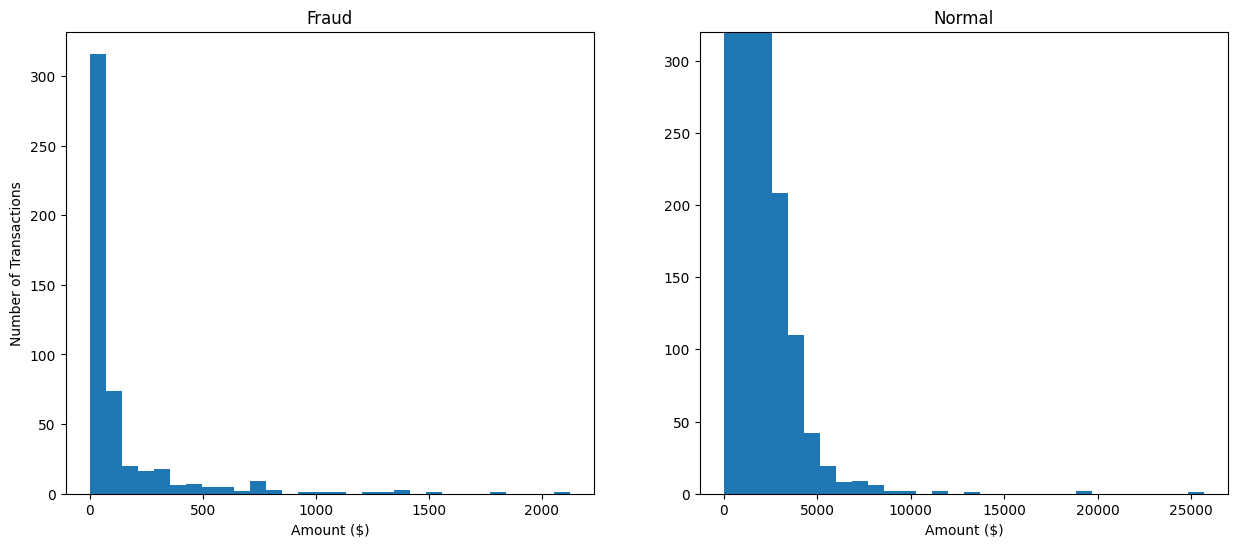

In [41]:
df_fraud = df[df['Class'] == 1]
df_ok = df[df['Class'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(df_fraud['Amount'], bins=bins)
ax2.hist(df_ok['Amount'], bins=bins)

ax1.set_title('Fraud')
ax2.set_title('Normal')

ax1.set_xlabel('Amount ($)')
ax2.set_xlabel('Amount ($)')
ax1.set_ylabel('Number of Transactions')

ax2.set_ylim(0, 320)
plt.show()

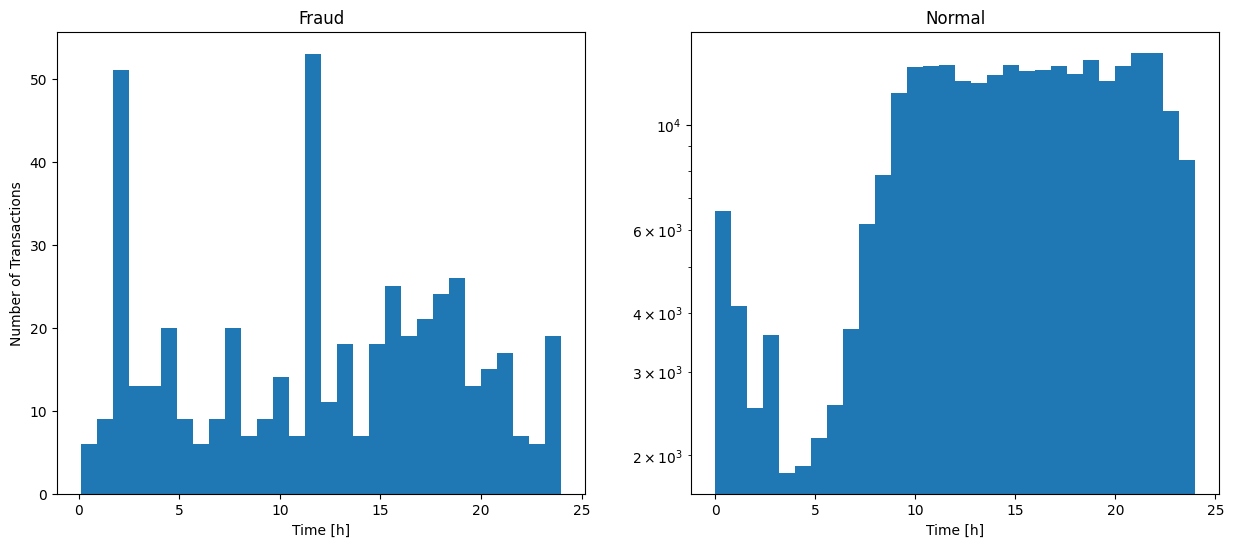

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(df_fraud['Time'], bins=bins)
ax2.hist(df_ok['Time'], bins=bins)

ax1.set_title('Fraud')
ax2.set_title('Normal')

ax1.set_xlabel('Time [h]')
ax2.set_xlabel('Time [h]')
ax1.set_ylabel('Number of Transactions')

ax2.set_yscale('log')
plt.show()

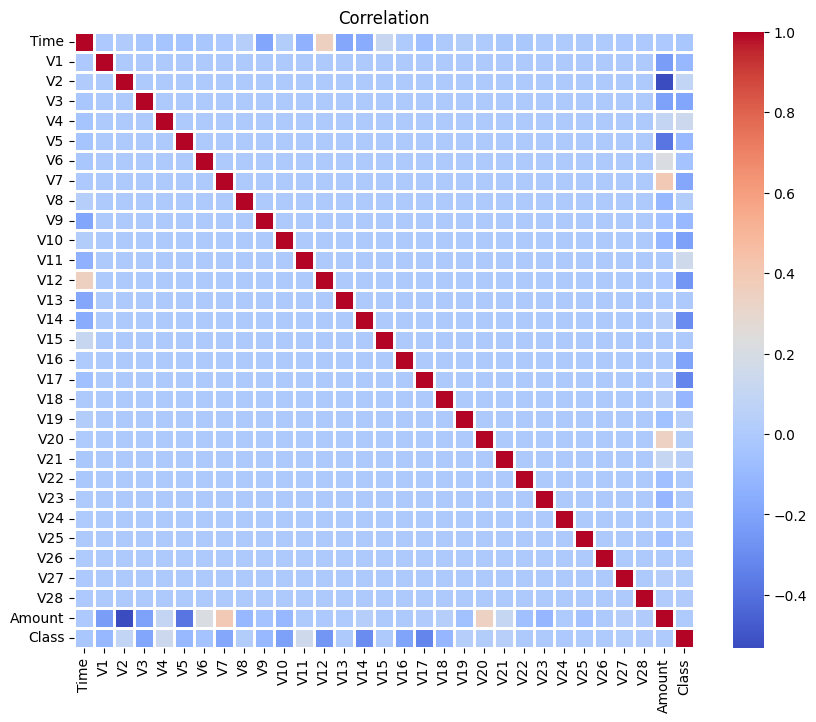

In [43]:
corr = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white")
plt.title("Correlation")
plt.show()

In [46]:
ok_sample = df[df['Class'] == 0].sample(2000)
df_tsne = pd.concat([ok_sample, df_fraud]).sample(frac=1).reset_index(drop=True)

In [47]:
X_tsne = df_tsne.drop(['Class'], axis = 1).values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

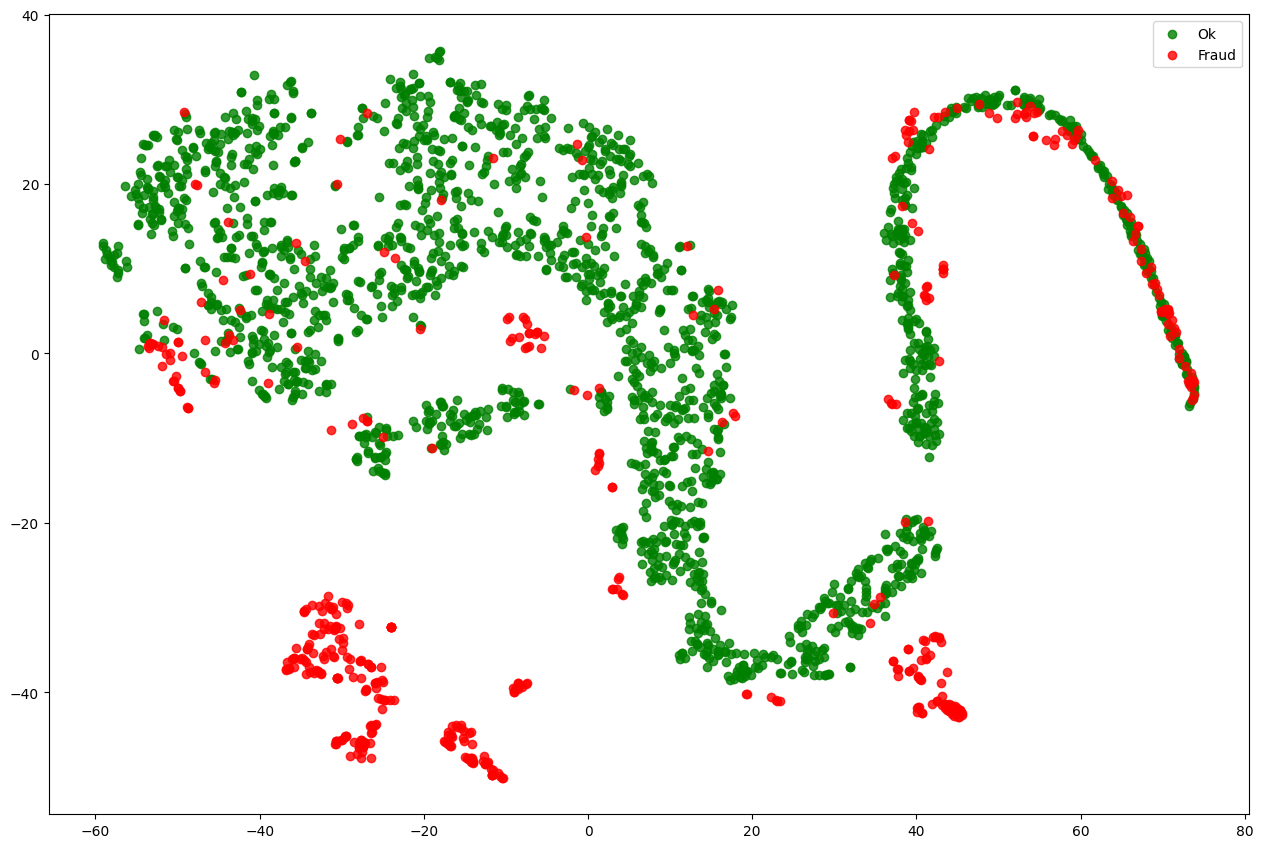

In [48]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
           marker='o', color='g', linewidth=1, alpha=0.8, label='Ok')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
ax.legend(loc='best')

In [49]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

((227845, 30), (56962, 30))

In [50]:
ss = StandardScaler()
X_tscaled = ss.fit_transform(X_train.values)
X_train = pd.DataFrame(X_tscaled, columns=X_train.columns, index=X_train.index)

X_vscaled = ss.transform(X_val.values)
X_val = pd.DataFrame(X_vscaled, columns=X_val.columns, index=X_val.index)

In [51]:
X.shape[1]

30

In [52]:
# input
inp = Input(shape=(X.shape[1],))

# Encoder
x = Dense(300, activation='relu')(inp)
x = Dense(150, activation='relu')(x)

# Decoder
x = Dense(150, activation='tanh')(x)
x = Dense(300, activation='tanh')(x)

## output
output = Dense(X.shape[1], activation='relu')(x)

autoencoder = Model(inp, output)

lr = 0.0001
epochs = 300
adam = Adam(learning_rate=lr, weight_decay=(lr/epochs))

autoencoder.compile(optimizer=adam, loss="mean_squared_error")
autoencoder.summary()

I0000 00:00:1731369614.765979  486694 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2289 MB memory:  -> device: 0, name: NVIDIA RTX A500 Laptop GPU, pci bus id: 0000:03:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │         9,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         9,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,430 (513.40 KB)

 Trainable params: 131,430 (513.40 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = autoencoder.fit(X_train.values, X_train.values, batch_size=2048, epochs=epochs,
                          shuffle=True, verbose=0)

I0000 00:00:1731369726.369248  488206 service.cc:148] XLA service 0x7f642000cc20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731369726.369271  488206 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A500 Laptop GPU, Compute Capability 8.6
2024-11-11 16:02:06.391213: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731369726.480591  488206 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-11 16:02:07.168816: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 132 bytes spill stores, 132 bytes spill loads

2024-11-11 16:02:07.252761: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 12 by

Text(0.5, 1.0, 'Training and validation loss')

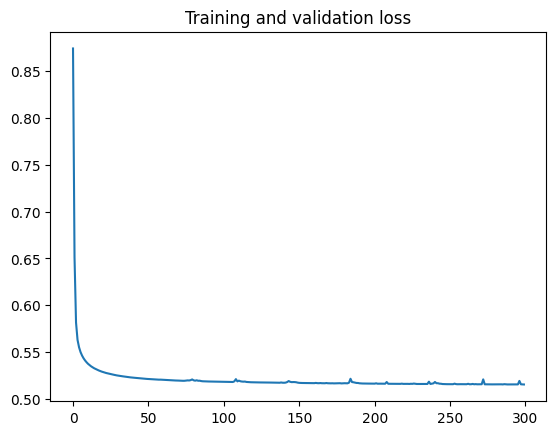

In [54]:
loss = history.history['loss']

ts = range(epochs)

plt.plot(ts, loss)
plt.title('Training and validation loss')

In [55]:
encoder = Sequential()
encoder.add(autoencoder.layers[0])
encoder.add(autoencoder.layers[1])
encoder.add(autoencoder.layers[2])

decoder = Sequential()
decoder.add(autoencoder.layers[3])
decoder.add(autoencoder.layers[4])
decoder.add(autoencoder.layers[5])

#### Train Eval

In [56]:
X_tt = encoder.predict(X_train)
X_dt = decoder.predict(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_train.columns, index=X_train.index)

reconstruction_score = []
for idx in X_train.index:
    score = mean_squared_error(X_train.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_train.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()
rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

2024-11-11 16:03:54.563268: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 132 bytes spill stores, 132 bytes spill loads

2024-11-11 16:03:54.616914: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 8 bytes spill stores, 8 bytes spill loads

2024-11-11 16:03:54.815928: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 148 bytes spill stores, 148 bytes spill loads



7086/7121 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step

2024-11-11 16:03:59.300472: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 180 bytes spill stores, 180 bytes spill loads



7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 626us/step


2024-11-11 16:04:02.360153: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19', 148 bytes spill stores, 148 bytes spill loads

2024-11-11 16:04:02.593245: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 404 bytes spill stores, 436 bytes spill loads



7098/7121 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step

2024-11-11 16:04:10.123827: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 260 bytes spill stores, 260 bytes spill loads



7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [57]:
pred = pd.DataFrame(index=X_train.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred.loc[x, 'fraud'] = 1
    
print(classification_report(y_train, pred['fraud']))
print('Rate of transations to investigate:', len(top_scores_idx) / len(X_train) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.16      0.60      0.25       394

    accuracy                           0.99    227845
   macro avg       0.58      0.80      0.63    227845
weighted avg       1.00      0.99      1.00    227845

Rate of transations to investigate: 0.6385920252803441 %


Text(0, 0.5, 'Number of samples')

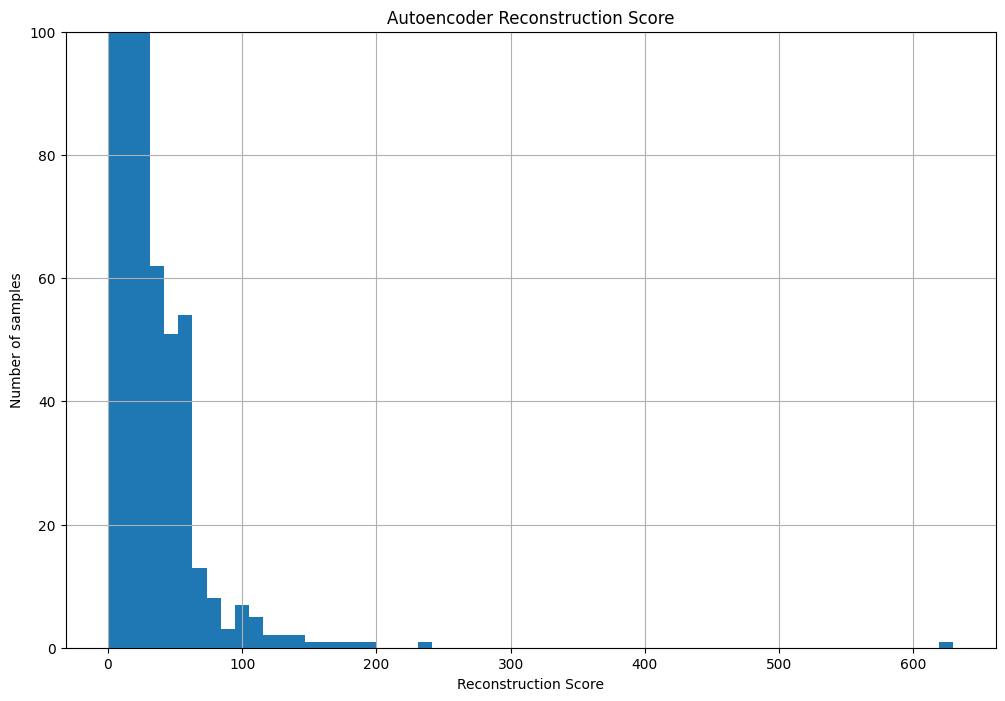

In [59]:
plt.figure(figsize=(12, 8))
rc_scores['reconstruction_score'].hist(bins=60)
plt.ylim(0, 100)
plt.title('Autoencoder Reconstruction Score')
plt.xlabel('Reconstruction Score')
plt.ylabel('Number of samples')

#### Val Eval

In [60]:
X_tt = encoder.predict(X_val)
X_dt = decoder.predict(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_val.columns, index=X_val.index)

reconstruction_score = []
for idx in X_val.index:
    score = mean_squared_error(X_val.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_val.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()
rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

1736/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step

2024-11-11 16:06:08.471739: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 180 bytes spill stores, 180 bytes spill loads



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1701/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step

2024-11-11 16:06:10.905841: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 260 bytes spill stores, 260 bytes spill loads



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [61]:
pred = pd.DataFrame(index=X_val.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred.loc[x, 'fraud'] = 1

print(classification_report(y_val, pred['fraud']))
print('Rate of transations to investigate:', len(top_scores_idx) / len(X_val) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.13      0.65      0.22        98

    accuracy                           0.99     56962
   macro avg       0.57      0.82      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Rate of transations to investigate: 0.8532003792001684 %


### TNSE

In [62]:
X_enc_tsne = encoder.predict(X_train)
X_enc_tsne = pd.DataFrame(X_enc_tsne, index=X_train.index)

X_enc_tsne['Class'] = y_train
ok_sample = X_enc_tsne[X_enc_tsne['Class'] == 0].sample(2000)
df_fraud = X_enc_tsne[X_enc_tsne['Class'] == 1]
df_tsne = pd.concat([ok_sample, df_fraud]).sample(frac=1).reset_index(drop=True)

X_tsne = df_tsne.values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 644us/step


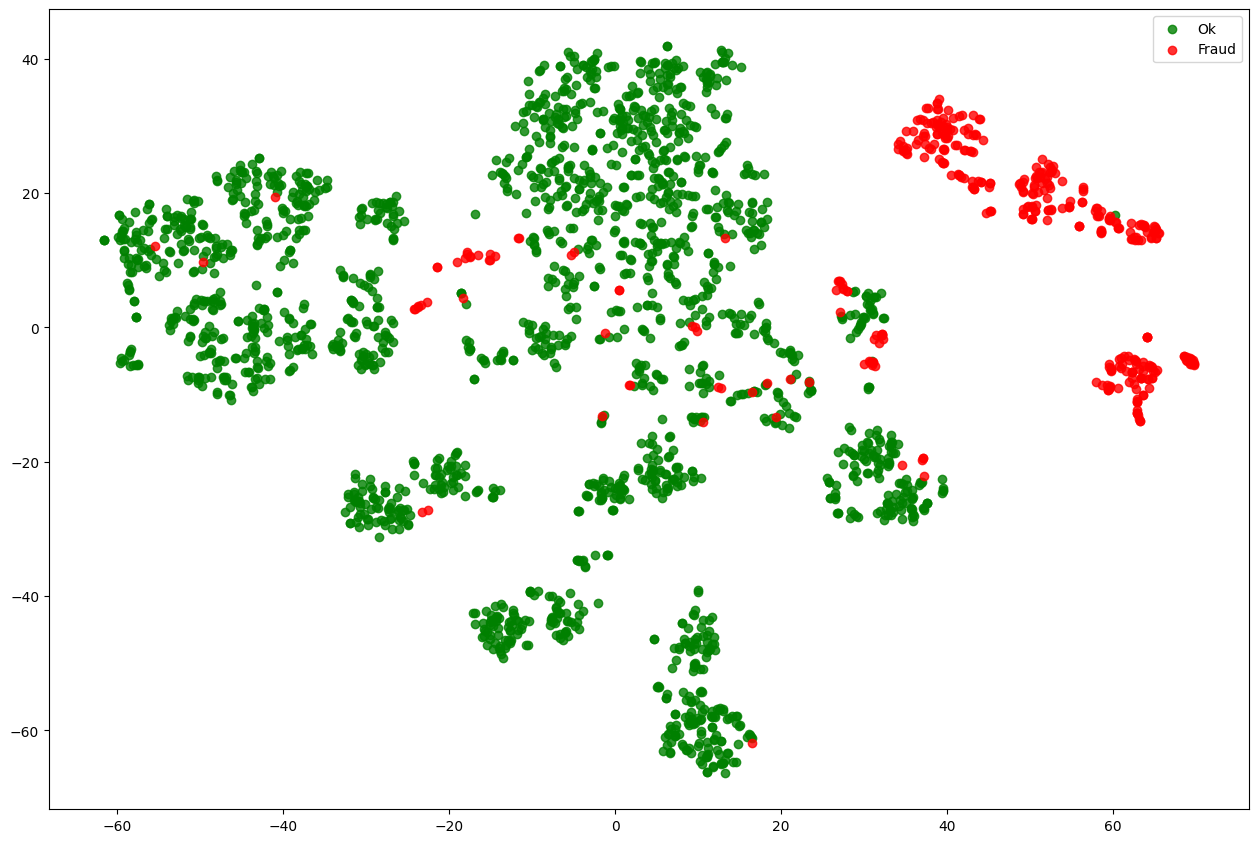

In [63]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
           marker='o', color='g', linewidth=1, alpha=0.8, label='Ok')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
ax.legend(loc='best')